# 🎯identifier 

[identifier](#id)
- [get overall pass/fail scores](#overall)
- [get pass/fail scores by division](#scoresbydiv)
- [look at failing scores by collection](#scoresbycoll)
- [look at failing scores within a collection](#scoresincoll)

[plotting](#plot)

[co-occurrences](#co)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('min-mandatory-score_2016-07-08.csv')

In [2]:
# testing 1-2 1-2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965066 entries, 0 to 965065
Data columns (total 25 columns):
uuid              965066 non-null object
mms_id            965066 non-null int64
mms_type          965066 non-null object
coll_id           962212 non-null float64
division          965066 non-null object
title_1           965066 non-null int64
title_2           965066 non-null int64
title             965066 non-null float64
typeOfResource    965066 non-null int64
genre_1           965066 non-null int64
genre_2           965066 non-null int64
genre             965066 non-null float64
date_1            965066 non-null int64
date_2            965066 non-null int64
date_3            965066 non-null int64
date_4            965066 non-null int64
date              965066 non-null float64
identifier        965066 non-null int64
location_1        965066 non-null int64
location_2        965066 non-null int64
location_3        965066 non-null int64
location_4        965066 non-null int6

In [3]:
# check that basic completeness scores look OK
df[['title_1','typeOfResource', 'identifier', 'date_1', 'genre_1', 'location_1']].describe()

,title_1,typeOfResource,identifier,date_1,genre_1,location_1
count,965066.000000,965066.000000,965066.000000,965066.000000,965066.000000,965066.000000
mean,0.999995,0.981278,0.592315,0.598546,0.753671,0.917343
std,0.002276,0.135542,0.491404,0.490193,0.430873,0.275362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##identifier<a id="id"></a>
####assertion: presence of at least one identifier type that corresponds to the catalog (local_bnumber), the Archives Portal (local_mss), or the Wallach catalog (local_tms)
- [get overall pass/fail scores](#overall)
- [get pass/fail scores by division](#scoresbydiv)
- [look at failing scores by collection](#scoresbycoll)
- [look at failing scores within a collection](#scoresincoll)

####get overall pass/fail scores<a id="overall"></a>

In [3]:
# df.identifier.value_counts()
df.identifier.value_counts()

1    571623
0    393443
dtype: int64

####get pass/fail scores by division<a id="scoresbydiv"></a>

In [4]:
ids_table = pd.pivot_table(df,index=['division'],columns=['identifier'], 
                              aggfunc={'identifier':len},fill_value=0)
ids_table

identifier  \
identifier                                                                                                     0   
division                                                                                                           
Art and Picture Collection                                                                                 10011   
Billy Rose Theatre Division                                                                               143316   
Carl H. Pforzheimer Collection of Shelley and His Circle                                                   14695   
Children's Center at 42nd St                                                                                  32   
Dorot Jewish Division                                                                                       1743   
Dorothy and Lewis B. Cullman Center for Scholars & Writers                                                    80   
General Research Division                                                                                    152   
George Arents Collection                                                                                     677   
Henry W. and Albert A. Berg Collection of English and American Literature                                   1358   
Irma and Paul Milstein Division of United States History, Local History and Genealogy                       1663   
Jerome Robbins Dance Division                                                                                513   
Jerome Robbins Dance Division - Audio and Moving Image                                                      1901   
Lionel Pincus and Princess Firyal Map Division                                                              6687   
Manuscripts and Archives Division                                                                           7347   
Music Division                                                                                             15414   
New York Public Library Archives                                                                               1   
Null                                                                                                          50   
RHA                                                                                                           48   
Rare Book Division                                                                                         25536   
Rodgers and Hammerstein Archives of Recorded Sound                                                          1484   
Schomburg Center for Research in Black Culture, Art and Artifacts Division                                   448   
Schomburg Center for Research in Black Culture, Jean Blackwell Hutson Research and Reference Division        194   
Schomburg Center for Research in Black Culture, Manuscripts, Archives and Rare Books Division                872   
Schomburg Center for Research in Black Culture, Moving Image and Recorded Sound Division                      23   
Schomburg Center for Research in Black Culture, Photographs and Prints Division                             2475   
Schomburg General Research and Reference Division                                                            498   
Science, Industry and Business Library: General Collection                                                  1933   
Slavic and East European Collections                                                                        1673   
Spencer Collection                                                                                         11886   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection         139   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection              49887   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection                    90705   
Theatre on Film and Tape Archive          

In [5]:
# look at failing identifier scores by division in descending order
# len = total rows and sum = rows that passed
aggregation = {
    'identifier':{
        'failing_scores':lambda x:len(x)-sum(x)
    }
}
# create dataframe that groups by division and aggregrate by dictionary
failed_identifiers = df.groupby('division').agg(aggregation)

# define failed identifiers
failed_ids = failed_identifiers['identifier']['failing_scores']
failed_ids.order(ascending=False)

division
Billy Rose Theatre Division                                     143316
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection     90705
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection     49887
Rare Book Division                                               25536
Music Division                                                   15414
Carl H. Pforzheimer Collection of Shelley and His Circle         14695
Spencer Collection                                               11886
Art and Picture Collection                                       10011
Manuscripts and Archives Division                                 7347
Lionel Pincus and Princess Firyal Map Division                    6687
Schomburg Center for Research in Black Culture, Photographs and Prints Division      2475
Science, Industry and Business Library: General Collection        1933
Jerome Robbins Dance Division - Audio and Moving Image      

####look at failing scores by collection<a id="scoresbycoll"></a>

In [6]:
ids_by_coll = pd.pivot_table(df,index=['coll_id'],columns=['identifier'],aggfunc={'identifier':len},fill_value=0)
ids_by_coll.head()

identifier        
identifier          0       1
coll_id                      
25776              33     838
25779               0  100951
25780           80499      43
25781               0   15790
25782           72659      30

In [7]:
# look at failing identifier scores by collection
df[df['identifier'] == 0.0][['mms_id', 'coll_id', 'division']].sort('coll_id').count()

mms_id      393443
coll_id     392090
division    393443
dtype: int64

####look at failing scores within a collection<a id="scoresincoll"></a>

In [11]:
# look at failing identifier scores within a collection
fid = df[df['identifier'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25792 is the Friedman-Abeles photograph collection
fid_25792 = fid[fid['coll_id'] == 25792][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for content
fid_25792.head()

,mms_id,coll_id,division
124235,3214190,25792,Billy Rose Theatre Division
124253,3214214,25792,Billy Rose Theatre Division
124275,3214241,25792,Billy Rose Theatre Division
124290,3214260,25792,Billy Rose Theatre Division
124311,3214287,25792,Billy Rose Theatre Division


In [12]:
# look at all identifier scores within a collection
df[df['coll_id'] == 25776][['mms_id', 'coll_id', 'division']].head()

,mms_id,coll_id,division
0,3012441,25776,Lionel Pincus and Princess Firyal Map Division
1,3012442,25776,Lionel Pincus and Princess Firyal Map Division
2,3012443,25776,Lionel Pincus and Princess Firyal Map Division
3,3012444,25776,Lionel Pincus and Princess Firyal Map Division
4,3012445,25776,Lionel Pincus and Princess Firyal Map Division


####write to csv

In [14]:
# write to csv
ids_by_coll = pd.pivot_table(df,index=['coll_id'],columns=['identifier'],aggfunc={'identifier':len},fill_value=0)
ids_by_coll.to_csv('ids_by_coll.csv')


##plotting<a id="plot"></a>

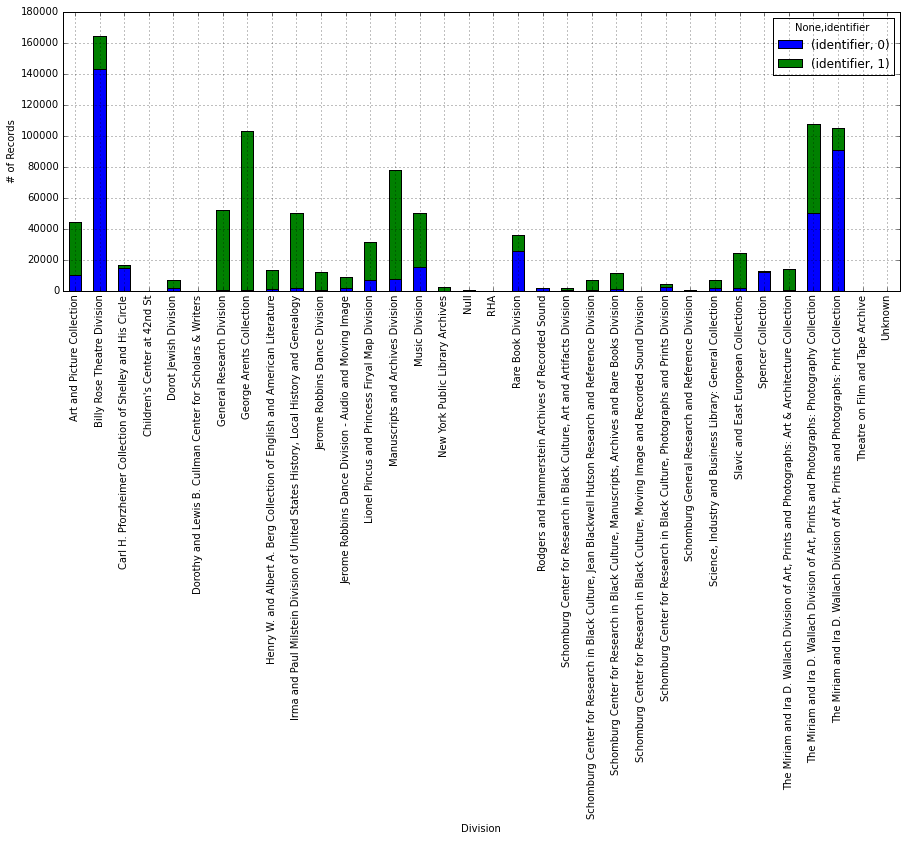

In [8]:
# create a bar chart plotting identifier score counts by division
ids_table = pd.pivot_table(df,index=['division'],columns=['identifier'], aggfunc={'identifier':len},fill_value=0)
idsscoresplot = ids_table.plot(kind='bar', figsize=(15,5), stacked=True)
idsscoresplot.set_xlabel('Division')
idsscoresplot.set_ylabel('# of Records')

##co-occurrence<a id="co"></a>

In [15]:
# co-occurrence maths examples

print 'Records with identifier element absent but shelf locator present:'
noids_loc3 = df[(df.identifier == 0.0) & (df.location_3 == 1.0)]
print len(noids_loc3)
print 'Records with identifier element absent but shelf locator present and in Wallach Prints:'
noids_tmsloc3 = df[(df.identifier == 0.0) & (df.location_3 == 1.0) & (df.division == 'The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection')]
print len(noids_tmsloc3)
print 'Records with identifier element absent but shelf locator present and in Wallach Photography:'
noids_tmsloc3 = df[(df.identifier == 0.0) & (df.location_3 == 1.0) & (df.division == 'The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection')]
print len(noids_tmsloc3)

print 'Records with identifier element present that are missing typeOfResource:'
ids_notype = df[(df.identifier == 1.0) & (df.typeOfResource == 0.0)]
print len(ids_notype)
print 'Records with identifier element present that are missing date:'
ids_nodates = df[(df.identifier == 1.0) & (df.date == 0.0)]
print len(ids_nodates)

print 'How many records do not have at least one date element present?'
nodates = df[(df.date == 0.0)]
print len(nodates)

print 'How many records without a date element have an identifier element?'
nodates_with_ids = df[(df.date == 0.0) & (df.identifier == 1.0)]
print len(nodates_with_ids)

Records with identifier element absent but shelf locator present:
238369
Records with identifier element absent but shelf locator present and in Wallach Prints:
16034
Records with identifier element absent but shelf locator present and in Wallach Photography:
16721
Records with identifier element present that are missing typeOfResource:
15385
Records with identifier element present that are missing date:
197679
How many records do not have at least one date element present?
387040
How many records without a date element have an identifier element?
197679
